<a href="https://colab.research.google.com/github/Vadimcha/MKN_Practic/blob/main/%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5-%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85-%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D0%94%D0%95%D0%9D%D0%AC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика 1

На этой практике мы посмотрим на временные ряды, попробуем модели из лекции, и
начнем соревнование!

Для начала склонируем наш репозиторий:

In [ ]:
!git clone https://github.com/ArChanDDD/TS-MCSSummer-2023.git

fatal: destination path 'TS-MCSSummer-2023' already exists and is not an empty directory.


# Шаг 1: Pandas

В этой главе мы познакомимся с очень полезной для ML библиотекой - `pandas`. Ее смысл - создавать датасеты и предоставлять функционал для работы с ними.

In [ ]:
# Импортируем ее
import pandas as pd
# А эта библиотека для красивых графиков
import matplotlib.pyplot as plt
# А это чтобы крутые операции быстро делать
import numpy as np

Все это время мы будем работать со датасетом `DailyDelhiClimate` - он содержит информацию о погодных условиях в Дели в 2013-2017 годах.

Сначала стоит посмотреть, что там вообще есть:

In [ ]:
df = pd.read_csv('TS-MCSSummer-2023/data/DailyDelhiClimateTrain.csv')

In [ ]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Читать его следует так:
* строка это запись
* столбец это параметр

Получается, из параметров у нас есть

* Дата
* Средняя температура
* Влажность
* Скорость ветра
* Среднее давление

Пример понимания датасета: 1 января 2013 года средняя температура была 10 градусов, влажность - 84.5, ветра не было, среднее давление - 1015 мм.рт.ст.

---

А теперь давайте разберемся, какие операции с датасетом можно делать (хотя корректнее его называть ДатаФрейм):

In [ ]:
# Cложение столбцов
(df['meantemp'] + df['humidity'])[:5]

0    94.500000
1    99.400000
2    94.166667
3    80.000000
4    92.833333
dtype: float64

Как мы видим, он возвращает странную штуку - но можно сделать так:

In [ ]:
list(df['meantemp'] + df['humidity'])[:5]

[94.5, 99.4, 94.16666666666667, 80.0, 92.83333333333333]

и вот это уже обычный список - а с ним можно спокойно работать :)

Можно кстати создать новый столбец из списка:

In [ ]:
df['meantemp + humidity'] = list(df['meantemp'] + df['humidity'])
df

,date,meantemp,humidity,wind_speed,meanpressure,meantemp + humidity
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,94.500000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,99.400000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,94.166667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,80.000000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,92.833333
...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,85.260870
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,103.095238
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,103.761905
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,102.052632


Здорово, да?

Помимо этого, столбцы аналогично поддерживают вычитание, деление, умножение, а также можно делать все эти действия с константой:

In [ ]:
(df['meantemp'] * 2)[:5]

0    20.000000
1    14.800000
2    14.333333
3    17.333333
4    12.000000
Name: meantemp, dtype: float64

Давай чуть-чуть попрактикуемся - посчитай для первых пяти записей разность удвоенной температуры и скорости ветра:

In [ ]:
# TODO

result = []
for i in range(5):
  result.append(df['meantemp'][i] * 2 - df['wind_speed'][i])

assert len(result) == 5, "Нужно посчитать только для первых 5 записей"
assert np.allclose(list(result), [20.0, 11.82, 9.7, 16.1, 8.3]), "Что-то посчитано не так"

Иногда появляется необходимость терироваться по записям в датасете - и, к сожалению, в пандасе с этим все грустно.
Но есть иной вариант:

In [ ]:
# Обернем датасет в массив из numpy
np.array(df[:5])

array([['2013-01-01', 10.0, 84.5, 0.0, 1015.6666666666666, 94.5],
       ['2013-01-02', 7.4, 92.0, 2.98, 1017.8, 99.4],
       ['2013-01-03', 7.166666666666667, 87.0, 4.633333333333334,
        1018.6666666666666, 94.16666666666667],
       ['2013-01-04', 8.666666666666666, 71.33333333333333,
        1.2333333333333334, 1017.1666666666666, 80.0],
       ['2013-01-05', 6.0, 86.83333333333333, 3.7, 1016.5,
        92.83333333333333]], dtype=object)

Как видно, теперь это обычный список из списков, каждый из которых соответствует одной записи. А по списку итерироваться уже не так и сложно!

Следующая задачка - посчитать сумму всех температур с помощью цикла `for`.

In [ ]:
# TODO

result = sum(df['meantemp'])

assert np.isclose(result, 37274.45)

Но вообще эту задачу можно было решить и так:

In [ ]:
result_2 = sum(df['meantemp'])

print(f'Было  - {result}')
print(f'Стало - {result_2}')

Было  - 37274.4511987237
Стало - 37274.4511987237


На этом вроде все, давайте уже модельки строить!

# Шаг 2: Обзор данных

Раз уж мы там в датасет напихали всякого, давайте заново его импортируем



In [ ]:
df = pd.read_csv('TS-MCSSummer-2023/data/DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


На самом деле тут есть проблемка, которую мы сейчас пофиксим:

In [ ]:
df['date']

0       2013-01-01
1       2013-01-02
2       2013-01-03
3       2013-01-04
4       2013-01-05
           ...    
1457    2016-12-28
1458    2016-12-29
1459    2016-12-30
1460    2016-12-31
1461    2017-01-01
Name: date, Length: 1462, dtype: object

Как мы видим, тип стоит `object` - это плохо, потому что графики будут кривыми (можете построить, если интересно). Но это фиксится просто:

In [ ]:
from datetime import datetime

df['date'] = [datetime.strptime(x, '%Y-%m-%d') for x in list(df['date'])]

df['date']

0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-05
          ...    
1457   2016-12-28
1458   2016-12-29
1459   2016-12-30
1460   2016-12-31
1461   2017-01-01
Name: date, Length: 1462, dtype: datetime64[ns]

Теперь хорошо!

**Наша главная цель** - научиться предсказывать температуру, поэтому, чтобы не забыть, создадим столбец `target`, который будет равен столбцу `meantemp`.

In [ ]:
df['target'] = df['meantemp']

А теперь давайте вообще посмотрим на наш временной ряд:

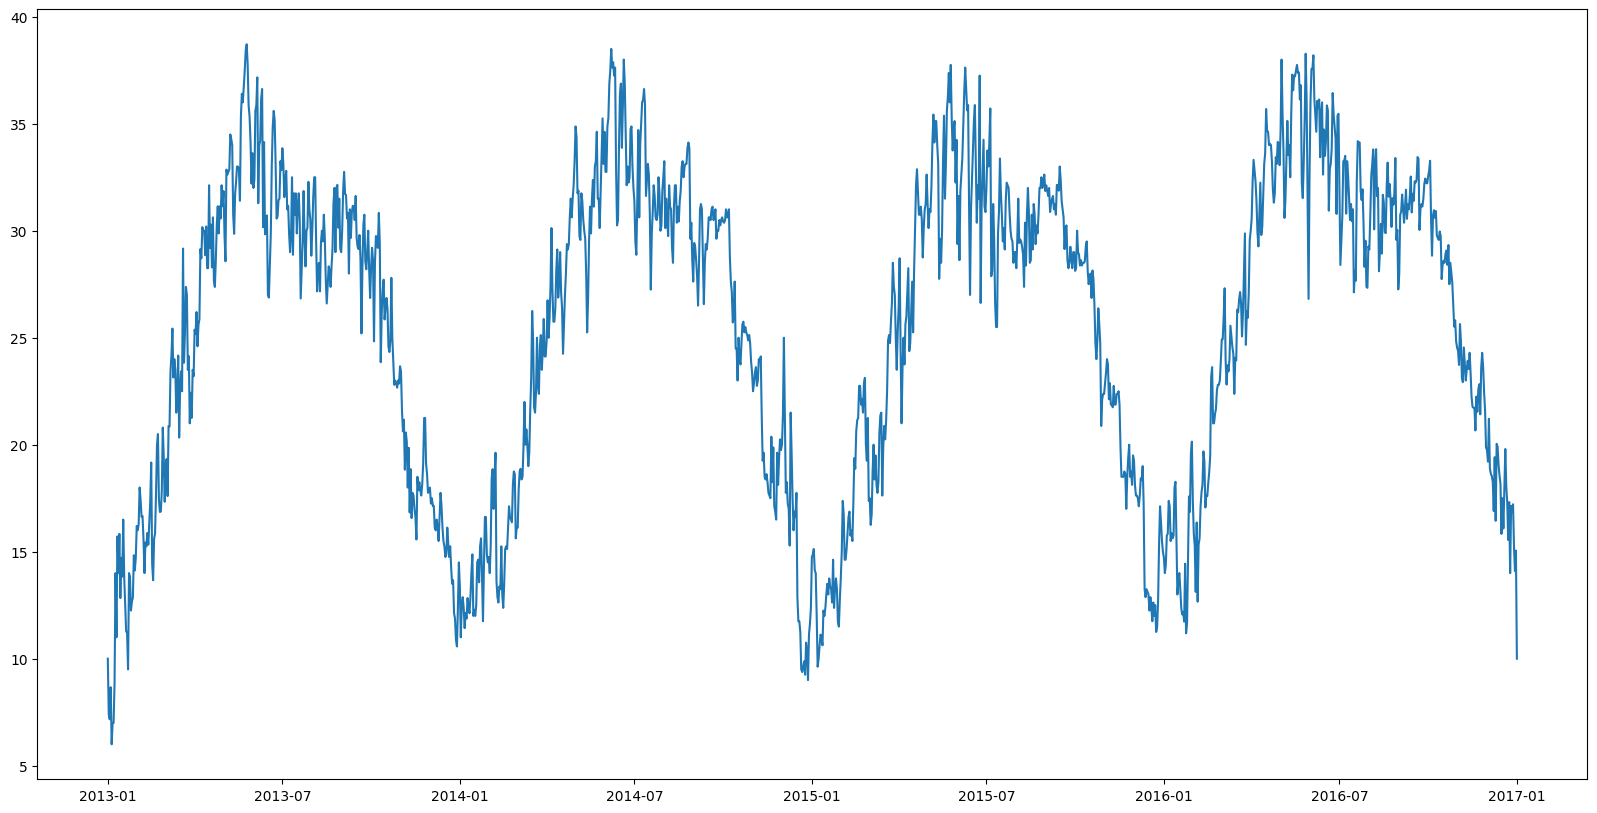

In [ ]:
_, _ = plt.subplots(1,1,figsize=(20,10))
_ = plt.plot(df['date'], df['target']) # это значит, что по оси ОХ будет дата, а по оси OY будет наша температура

Первое правило при работе с любой задачей машинного обучения - понять, что за данные. Что мы можем сказать про этот ряд? Есть ли у него тренд? А периодичность? Можно его назвать стационарным?

# Шаг 3: Наивная модель

Понимаю, хочется начать предсказывать - мы же тут как раз для этого!

Поэтому, давайте начнем с базовой модели - наивной. На всякий случай напомню, что это:

**Наивной моделью** для задачи прогнозирования временных рядов называется модель, которая сопоставляет $y_t$ значение, которое было $lag$ шагов назад - то есть $y_{t-lag}$

Для оценки наших моделей мы будем использовать валидацию на последнем "горбу" - вот этой четвертой горке на графике.

Для этого мы разобьем датасет на две части - на одной мы будем обучаться, а на другой проверять качество наших моделек.

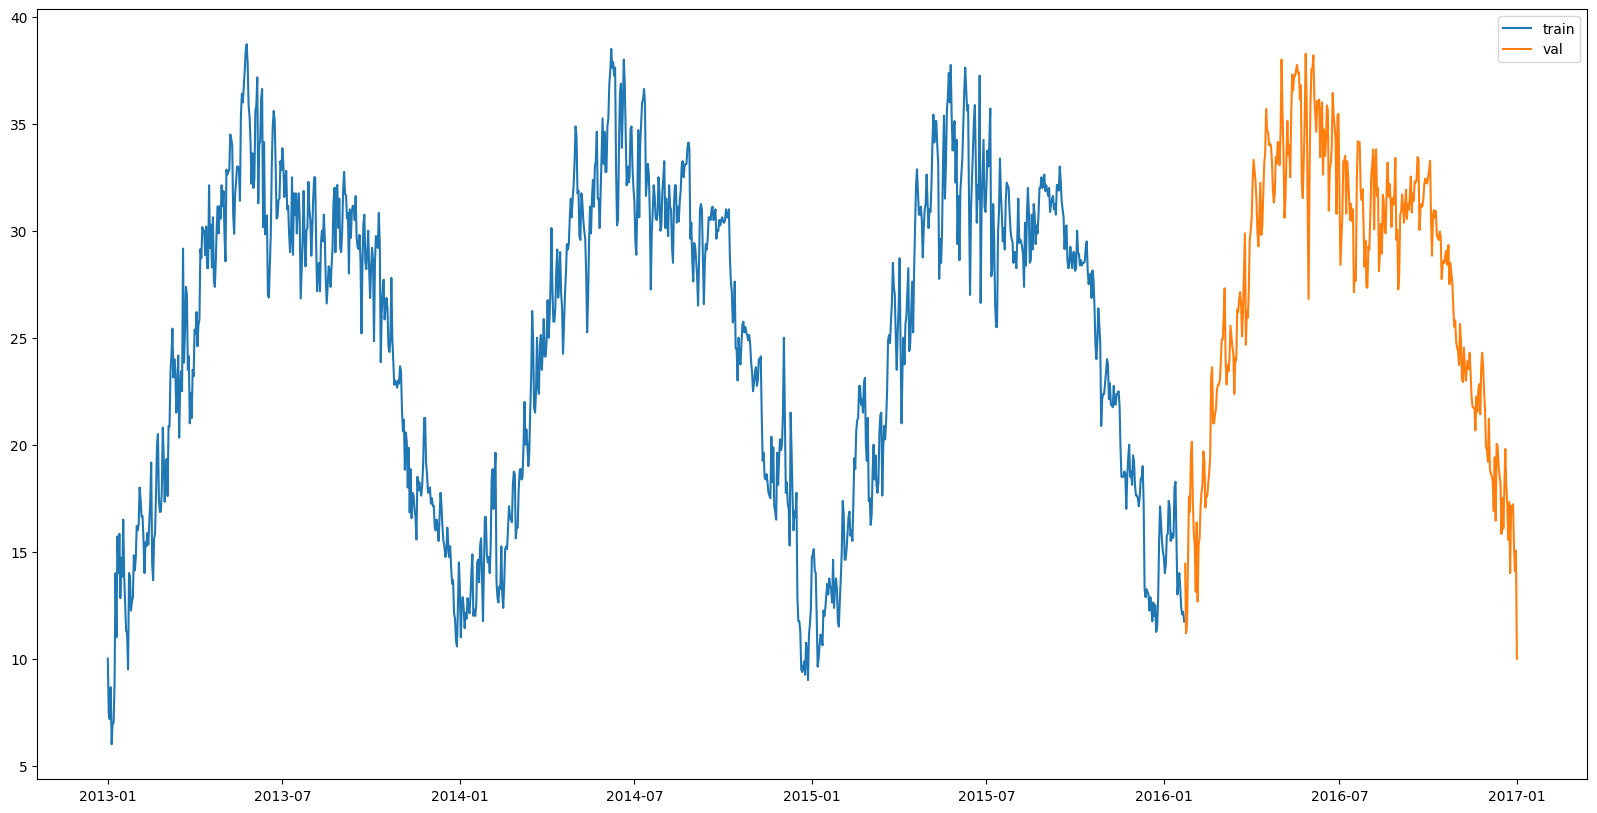

In [ ]:
val_start = 1117

df_train = df[:val_start]
df_val = df[val_start:]

_, _ = plt.subplots(1,1,figsize=(20,10))
_ = plt.plot(df_train['date'], df_train['target'], label='train')
_ = plt.plot(df_val['date'], df_val['target'], label='val')
_ = plt.legend()

In [ ]:
# Просто функция для построения графиков
def plot_graph(y_pred):
  _, _ = plt.subplots(1,1,figsize=(18,10))
  _ = plt.plot(df_train['date'], df_train['target'], label='train')
  _ = plt.plot(df_val['date'], df_val['target'], label='val')
  _ = plt.plot(df_val['date'], y_pred, label='predict')
  _ = plt.legend()

In [ ]:
df_train.head(100)

,date,meantemp,humidity,wind_speed,meanpressure,target
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,10.000000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.400000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,7.166667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,8.666667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,6.000000
...,...,...,...,...,...,...
95,2013-04-06,25.857143,29.857143,11.900000,1006.142857,25.857143
96,2013-04-07,29.142857,23.285714,10.314286,1005.000000,29.142857
97,2013-04-08,28.714286,33.857143,5.300000,1006.000000,28.714286
98,2013-04-09,30.166667,30.500000,8.650000,1005.333333,30.166667


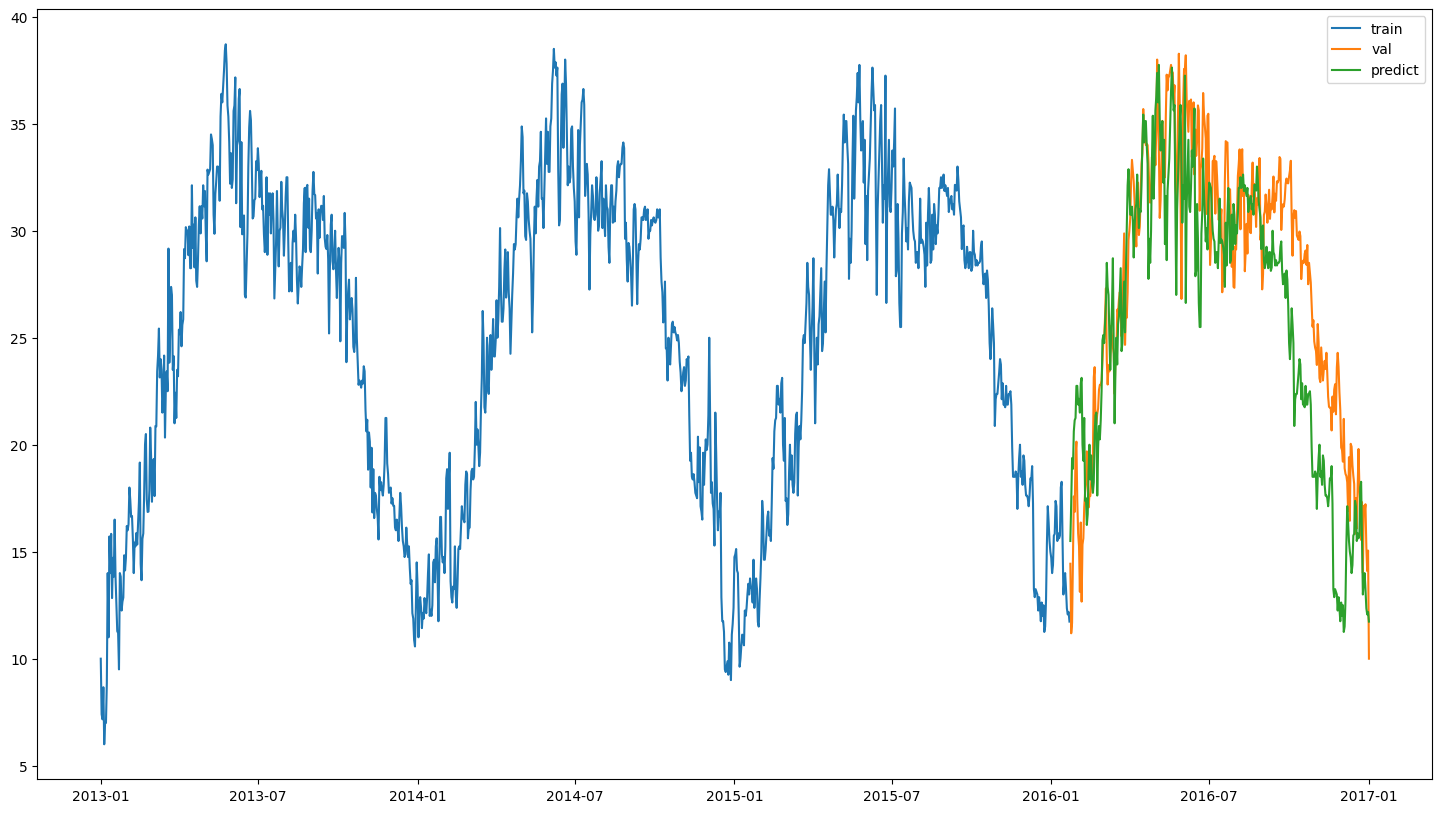

In [ ]:
lag = len(df_val) # пусть будет так

# TODO
# Необходимо для каждого i < len(df_val) добавить в y_pred то значение, которое было в df_train lag позиций назад

y_pred = []

for i in range(len(df_val)):
    y_pred.append(np.array(df_train['meantemp'])[i - lag])


plot_graph(y_pred)

Вначале вроде как даже неплохо, но потом становится совсем плохо...

Давайте оценим насколько все плохо - для этого посчитаем функцию
$$
MSE = \frac{1}{n}\sum_{i=0}^n (y_i - \hat{y}_i)^2
$$

Где:

* $y_i$ - правильно значение (которое `val`)
* $\hat{y}_i$ - предсказанное значение (которое `y_pred`)
* $n$ - длина массива `y_pred` и `val`

Реализуйте эту функцию!

In [ ]:
# TODO

def MSE(y_true, y_pred):
  result = np.square(np.subtract(y_true,y_pred)).mean()
  return result

In [ ]:
mse = MSE(list(df_val['target']), y_pred)
print(mse)

assert np.isclose(mse, 17.575336), "Функция делает что-то не так..."

17.575335942932853


Сложно сказать, хорошо это или нет, но будем считать эту ошибку ориентиром. Наша цель - сделать ее как можно меньше (а значит предсказание станет наиболее правильным).

# Шаг 4: Линейная регрессия

Наш следующий шаг - построить линейную регрессию. К огромному счастью, в питоне это все уже есть, а значит наша задача лишь подготовить данные

## Регрессия на одном параметре

Для начала давайте попробуем, как в примере на лекции, построить регрессию, в которой `x` будет равен дню в месяце.

<details><summary> Подсказка 1 </summary>

Не забывайте о том, что по `df_train['date']` можно итерироваться!

</details>

<details><summary> Подсказка 2 </summary>

Можно сделать для каждого `x` в `df_train['date']` можно сделать `x.day` и получить день месяца.

</details>

In [ ]:
df_train.shape

(1117, 6)

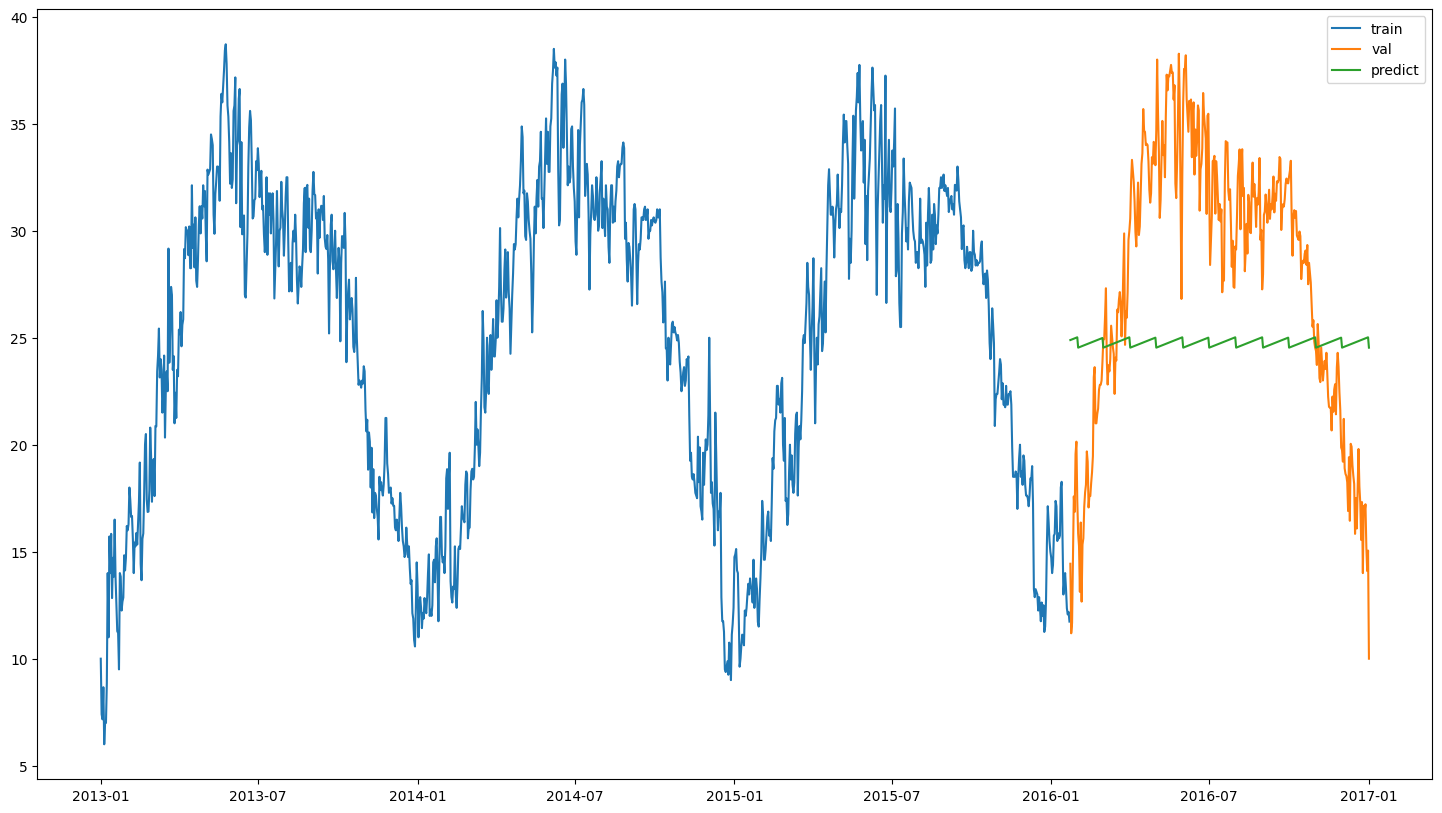

In [ ]:
# Достаем модель - линейную регрессию
from sklearn.linear_model import LinearRegression

# Почти у всех основных моделей в ML есть основные методы:
# * fit() - обучение модели, на вход как правило подается X - данные, y - целевое значение
# * predict() - предсказание, на вход подается X - возвраещается y_pred

# Определяем модель
model = LinearRegression()

# TODO
# X и X_val строятся одинаковым алгоритмом, но на разных датасетах

y = list(df_train['target'])
X = np.array([x.day for x in df_train['date']])
X_val = np.array([x.day for x in df_val['date']])



# Тут сначала оборачиваем в массив numpy, потом делаем так, чтобы числа были в столбик, а не в строку
X = np.array(X).reshape(-1, 1)
X_val = np.array(X_val).reshape(-1, 1)



# Ну и обучаем, конечно
model.fit(X, y)

y_pred = model.predict(X_val)

plot_graph(y_pred)

Получилось что-то странное, не так ли? И в этом на самом деле нет ничего странного - насколько мы помним, наша функция принимала вид $y=kx$, а даже при учете, что дни чередуются, описать что-то не получится :(

В любом случае, посчитаем MSE

In [ ]:
MSE(y_pred, list(df_val['target']))

50.1365294568746

Cурово. Попробуем сделать регрессию на нескольких параметрах - построим $y=\sum k_ix_i$

## Регрессия на нескольких параметрах

Вообще, по графику можно увидеть, что линейной функцией приблизить не получится - вот бы можно было сделать что-то вроде $y=k_1x_1 + k_2x_2^2$...

Но ведь так можно сделать! С одно стороны, это уже полиномиальная регрессия, с другой стороны - это линейная регрессия, в которой есть полиномы. Поэтому давайте создадим эти полиному - сделайте аналогично прыдущему пункту, но теперь мы будем обучаться не на `[day]`, а на `[day, day^2, month, month^2]`

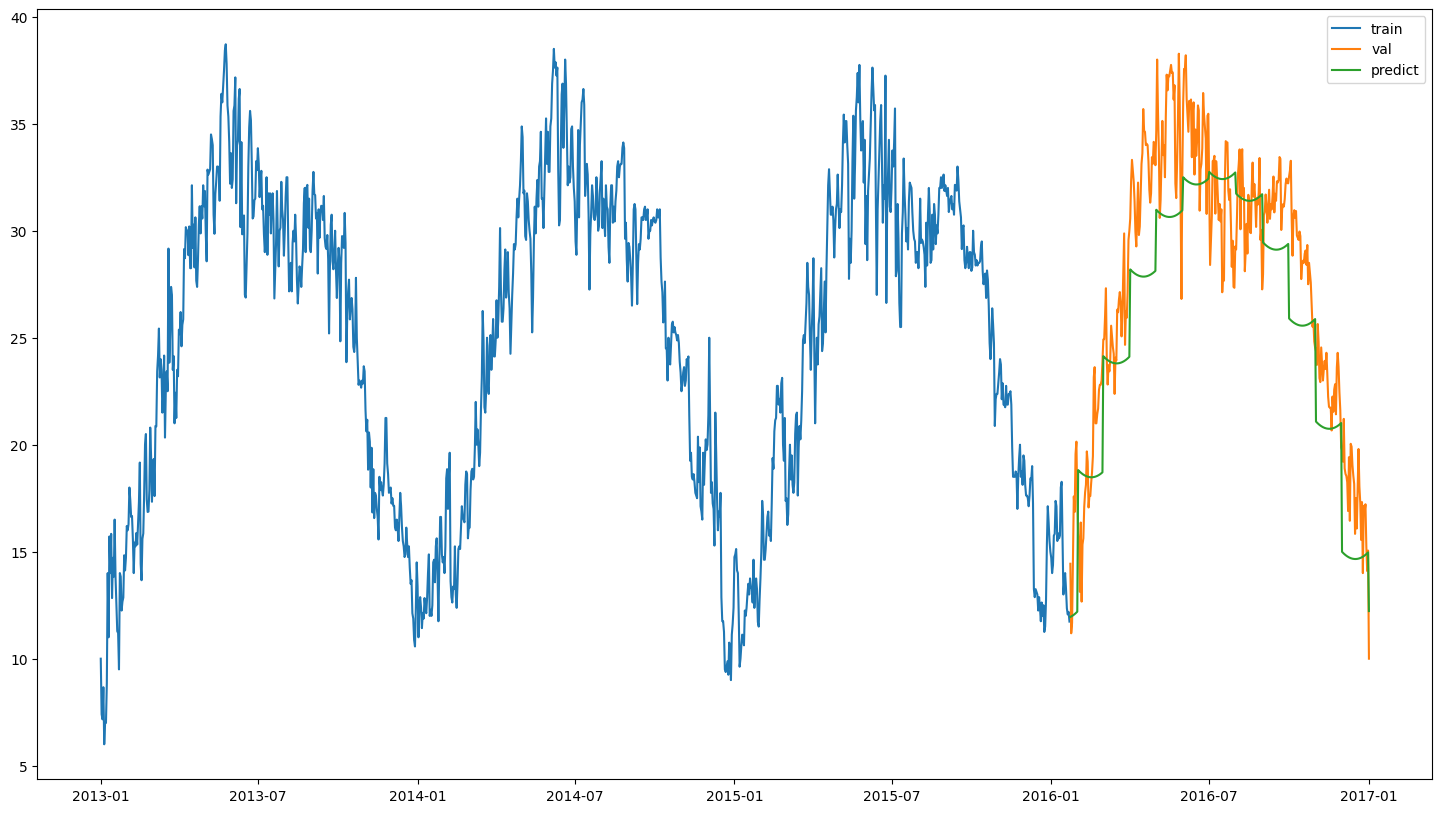

In [ ]:
model = LinearRegression()

# TODO

y = list(df_train['target'])
X = np.array([[x.day, x.day ** 2, x.month, x.month ** 2] for x in df_train['date']])
X_val = np.array([[x.day, x.day ** 2, x.month, x.month ** 2] for x in df_val['date']])


# Тут сначала оборачиваем в массив numpy, потом делаем так, чтобы числа были в столбик, а не в строку
X = np.array(X).reshape(-1, 4)
X_val = np.array(X_val).reshape(-1,4)
# Ну и обучаем, конечно
model.fit(X, y)

y_predR = model.predict(X_val)

plot_graph(y_predR)

In [ ]:
MSE(y_pred, list(df_val['target']))

50.1365294568746

Ну это ведь уже совсем другое дело! Даже на графике видно, что стало заметно лучше, а MSE стал лучше почти на 40%! И все благодаря тому, что мы добавили несколько экзогенных переменных.

На самом деле, Линейная регрессия - штука очень мощная. И не просто так всякие дата-саентисты часто ей пользуются - ведь она умеет так:

In [ ]:
list(model.coef_)

[-0.046892508017624956,
 0.0014363104314372697,
 8.491646540868006,
 -0.6338343894827367]

Это коэфициенты нашей модели - $i$-й коэфициент соответсвует $i$-му параметру в $X$.

Видно, что модель обращает большое внимание на месяц, а не на день - именно поэтому наша предыдущая модель была такой плохой.

---

Не думайте, что линейная регрессия это не тру - ради интереса можете попробовать добавить еще параметров. Вот увидите, результат может быть очень крутым 😁

А мы идем дальше к самой крутой моделе в лекции

# Шаг 5: ARIMA

Пришло время вспомнить, что это такое, и почему нам тут стоит использовать именно `ARIMA`, а не `ARMA` (или нет?)

Поскольку `ARIMA` из разряда чуть выше, чем линейная регрессия, в ней методы будут уже несколько другими. В ней помимо метода `predict` есть метод `forecast` - потому что именно так называют предсказание временного ряда. В то же время `predict` предсказывает значения для *уже известных* данных

Посмотрим, как она работает:

p.s. а работает она заметно дольше

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


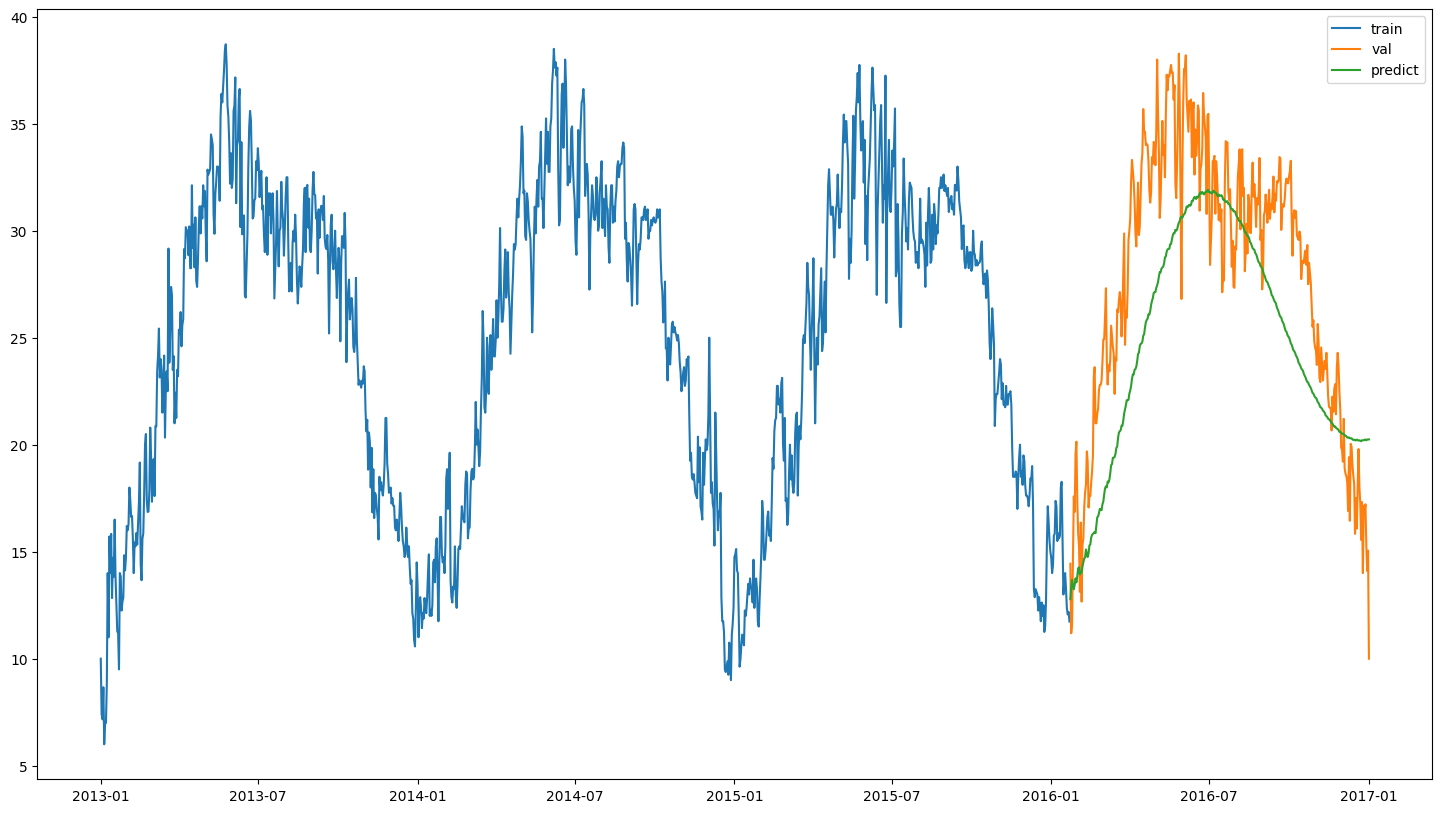

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA

# # Order идет в следующем порядке - p, d, q - учтите это

# model = ARIMA(
#     endog=df_train.target,
#     exog=None,
#     order=(10, 0, 12),
#     seasonal_order=(0, 0, 0, 0),
#     trend=None,
#     enforce_stationarity=True,
#     enforce_invertibility=True,
#     concentrate_scale=False,
#     trend_offset=1,
#     dates=None,
#     freq=None,
#     missing='none',
#     validate_specification=True
#     )
# modelfit = model.fit()

# y_pred = modelfit.forecast(steps=len(df_val))

# plot_graph(y_pred)


In [ ]:
MSE(list(df_val['target']), list(y_pred))

22.779406019422154

На самом деле, не так плохо - но кажется, что у линейно регрессии ошибка была сильно меньше. Значит ли это, что регрессия гораздо лучше чем ARIMA?

Cпойлер - нет. Регрессия не имеет никаких параметров, все что она делает - минимизирует функцию. А вот ARIMA в зависимости от параметров `p`, `q` и `d` может давать очень разные результаты. Имеет смысл попрактиковаться!

In [ ]:
# Сюда можно скопировать код с АРИМой и попробовать сделать ее лучше

# Cоревнование

Наш следующий этап - понять, насколько вообще наши предсказания хорошие.

Для этого мы пойдем по пути крутых ML-разработчиков, и обратимся к **Kaggle**.

Cсылка на наше соревнование - https://www.kaggle.com/t/91f9d8ed4419473dad88151c5e7411f3

Надеемся, к этому моменту преподаватель уже рассказал, как им пользоваться, но если нет - расскажем тут.

1.   Для начала нужно будет зарегистрироваться в `kaggle` - можно войти через гугл, это не особо важно.
2.   По старой методике делаем `y_pred`, но теперь не для `df_val`, а для `df_test`, и запускаем функцию `make_submission_file`. Если все ок - качаем файлик на компьютер и идем на страничку соревнования в `kaggle`.
3.   На странице соревнования жмем большую синюю кнопку `Make Submission` и заливаем туда наш файлик.
4.   Ждем результата и думаем как сделать его еще лучше!
5.   (не обязательно) В случае проблем или вопросов пишем преподавателям 🎃



In [ ]:
df_test = pd.read_csv('TS-MCSSummer-2023/data/DailyDelhiClimateTest.csv')
df_test = df_test[['date', 'humidity', 'wind_speed', 'meanpressure']]
old_dates = list(df_test['date'])
df_test['date'] = [datetime.strptime(x, '%Y-%m-%d') for x in df_test['date']]
df_test

,date,humidity,wind_speed,meanpressure
0,2017-01-01,85.869565,2.743478,59.000000
1,2017-01-02,77.222222,2.894444,1018.277778
2,2017-01-03,81.888889,4.016667,1018.333333
3,2017-01-04,70.050000,4.545000,1015.700000
4,2017-01-05,74.944444,3.300000,1014.333333
...,...,...,...,...
109,2017-04-20,27.500000,5.562500,998.625000
110,2017-04-21,39.375000,6.962500,999.875000
111,2017-04-22,40.900000,8.890000,1001.600000
112,2017-04-23,27.500000,9.962500,1002.125000


In [ ]:
# Функция для проверки корректности перед отправкой

def check_submission(df_to_check):
  assert str(type(df_to_check)) == "<class 'pandas.core.frame.DataFrame'>", "Это не датафрейм"
  assert len(df_to_check) == 114, "Длина датафрейма должна быть 114"
  assert list(df_to_check.columns) == ['date', 'target'], "У датафрейма должны быть колонки ['date', 'target']"

  df_to_check.set_index('date').to_csv('submission.csv')

def make_submission_file(y_pred):
  assert len(y_pred) == 114, "Длина датафрейма должна быть 114"

  df_sub = pd.DataFrame(data=np.array([old_dates, y_pred]).transpose(), columns=['date', 'target'])
  check_submission(df_sub)

In [ ]:
X.shape

(1117, 4)

ValueError: ignored

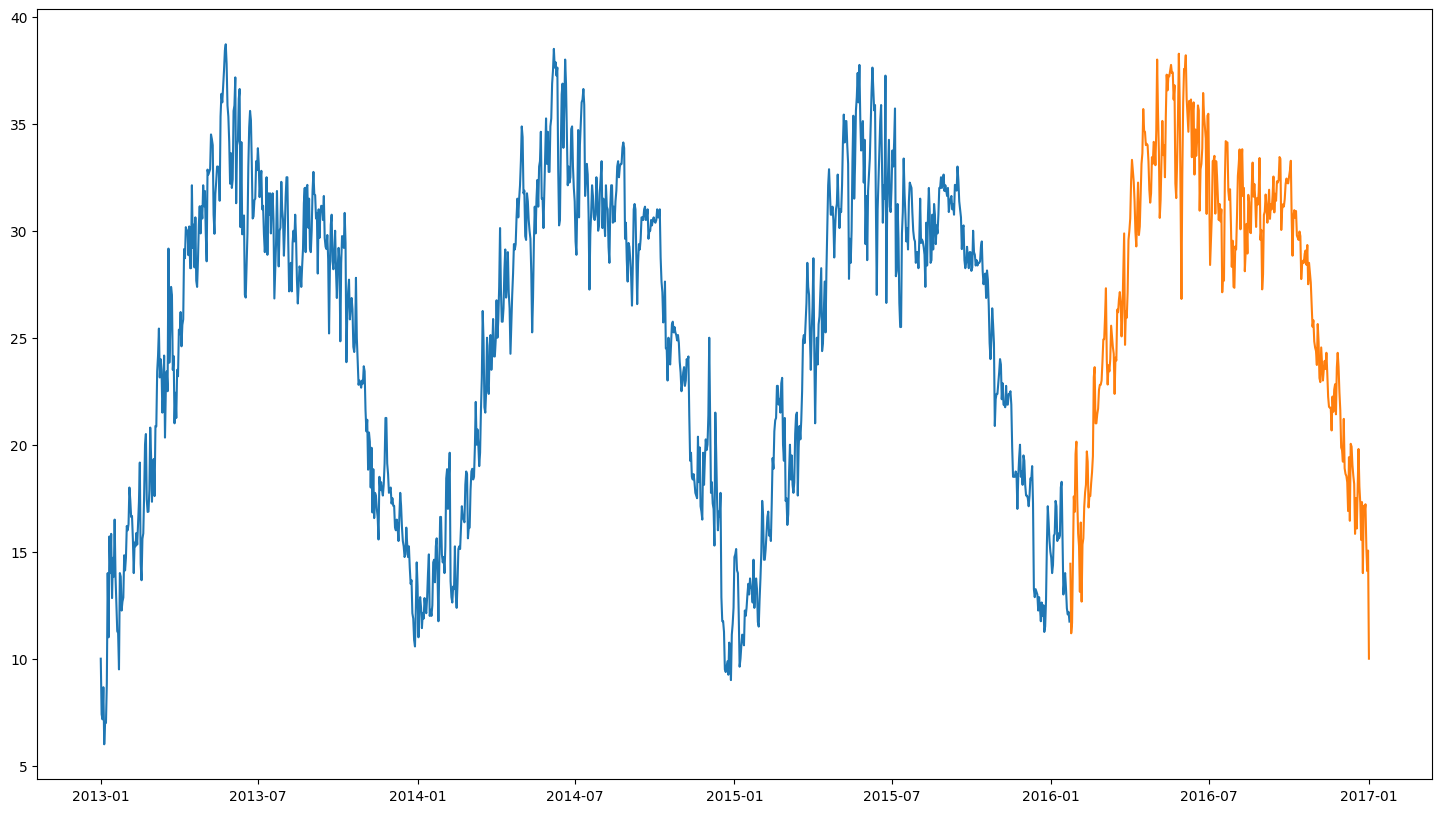

In [ ]:
model = LinearRegression()

# TODO

y = list(df_train['target'])
X = np.array([[x.day, x.month, x.day**2, x.month**2,] for x in df_train['date']])
X_test = np.array([[x.day, x.month, x.day**2, x.month**2] for x in df_test['date']])


# Тут сначала оборачиваем в массив numpy, потом делаем так, чтобы числа были в столбик, а не в строку
X = np.array(X).reshape(-1, 4)
X_test = np.array(X_test).reshape(-1, 4)
# Ну и обучаем, конечно
model.fit(X, y)

y_predR = model.predict(X_test)

plot_graph(y_predR)

In [ ]:
make_submission_file(y_predR)

In [ ]:
# Все что вы захотите!